### __Ejercicio 1__
***

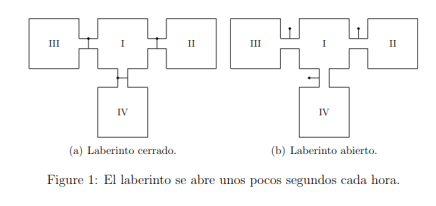

En el instante inicial 20 ratones se encuentran en el compartimiento I. Las puertas que separan los compartimientos permanecen cerradas salvo durante un breve lapso cada hora, donde los ratones pueden pasar a un comportamiento adyacente o permanecer en el mismo. Se supone que nada distingue un compartimento de otro, es decir que es igualmente probable que un ratón pase a cualquiera de los adyacentes o se quede en el compartimiento en el que está. Se realizan observaciones cada hora y se registra el número de ratones en cada compartimiento.

#### __Ítem A__
***

Determinar la matriz de transición del proceso P.

Comenzamos importando la biblioteca numpy, que nos permite operar con arreglos (arrays) multidimensionales, es decir, matrices, así como realizar operaciones matemáticas de alto nivel.

In [62]:
import numpy as np

# "as np" quiere decir que cada vez que llamemos a una función, método o clase de la librería numpy,
# tenemos que especificarlo con un "np.".
# De esta forma el sistema reconoce que la función proviene de esa librería.

Si les da error y dice que no existe la librería, prueben en una celda aparte poner:

In [63]:
# pip install numpy

Esto debería instalarles la librería. Luego de esto, prueben de nuevo el _import numpy_.

Necesitamos representar las transiciones entre compartimentos. Los 20 ratones se encuentran en el inicio en el compartimento I. Luego de que se abren las puertas, solo hay 4 eventos posibles para cada ratón:
- Se queda en el I.
- Pasa al II.
- Pasa al III.
- Pasa al IV.

Cada uno de estos eventos es igualmente probable (25%). Sin embargo, para los demás compartimentos la probabilidad no es la misma. El II solo está conectado con el I, por ende, para un ratón que esté en el II, la probabilidad va a ser de 50% de quedarse y 50% de irse al I. Lo mismo con el III y IV.

Creamos entonces la matriz de transición, dónde cada fila de la matriz representa las probabilidades que tiene un ratón de pasar a determinado compartimento estando en un compartimento específico. Las columnas representan la probabilidad de destino, es decir, de que lleguen a ese compartimento.

In [64]:
# Creamos la matriz de transición.
Matriz_Transicion = np.array([[1/4, 1/4, 1/4, 1/4],  # Compartimiento I
                              [1/2, 1/2, 0, 0],  # Compartimiento II
                              [1/2, 0, 1/2, 0],  # Compartimiento III
                              [1/2, 0, 0, 1/2] # Compartimiento IV
                              ])


# La función array crea un arreglo de numpy. 
# Cada elemento del array representa una fila (i), y cada elemento dentro de un elemento representa
# una columna (j).
# En este caso, la matriz es de 4x4.

In [65]:
# Imprimimos la matriz para visualizarla.
print(Matriz_Transicion)

[[0.25 0.25 0.25 0.25]
 [0.5  0.5  0.   0.  ]
 [0.5  0.   0.5  0.  ]
 [0.5  0.   0.   0.5 ]]


#### __Ítem B__
***

Determinar cuántos ratones habrá en cada celda al cabo de 4 horas.

Tenemos 20 ratones. Vamos a definirlo en una variable.

In [66]:
Cantidad_Ratones = 20

Definimos las horas.

In [67]:
Horas = 4

Definimos el estado de ratones con el estado inicial con un array de cuatro elementos, donde cada elemento representa un compartimento y la cantidad de ratones que hay en él.

In [68]:
Estado = np.array([Cantidad_Ratones, 0, 0, 0])

Vamos a multiplicar la matriz de transición por el estado tantas veces como horas nos indican, ya que hay una transición de los ratones una vez por hora. Para eso utilizamos un bucle for:

In [69]:
for i in range(0, Horas):
    Estado = np.dot(Estado, Matriz_Transicion) # np.dot es igual a multiplicación de matrices.
    Estado = np.round(Estado)                  # np.round redondea los números a cero decimales.
    Estado = Estado.astype(int)                # astype convierte los datos al tipo especificado, en este caso int (enteros).

# El bucle itera tantas veces como lo indica el rango (range) que especificamos. En este caso, es
# de 0 hasta 3 (Horas = 4, y este número no se incluye). En este caso el 0 es el primer paso, por 
# ende de 0 a 3 tenemos 4 pasos. 

Imprimimos el estado final y vemos cuántos ratones hay en cada compartimento al cabo de 4 horas.

In [70]:
print(Estado)

[8 4 4 4]


### __Ítem c__
***

Decidir si existe o no un estado de equilibrio.



d) Decidir si existe P∞ y en tal caso calcularla. ¿Qué aspecto tiene? ¿Por qué?

In [71]:
import pandas as pd

En el archivo infantesConBajoPesoAlNacer.txt se encuentran los datos correspondientes a mediciones de 100 niños nacidos con bajo peso en Boston (Labor and Deliver Characteristics and the Risk of Germinal Matrix Hemorrhage in Low Birth Weight Infants. Journal of Child Neurology, 6(1), 35-40, (1991)).

Definimos las siguientes variables:

- Y: perímetro cefálico del bebé al nacer, en centímetros (columna headcirc).
- X1: edad gestacional del bebé al nacer, en semanas (columna gestage).
- X2: peso al nacer del bebé, en gramos (columna birthwt).

Tareas:

a) Graficar X1 vs. Y y X2 vs. Y. ¿Qué tipo de relación observas en cada caso?

b) Plantear un modelo de regresión lineal para predecir el perímetro cefálico del bebé en función de su edad gestacional.

c) Plantear un modelo de regresión lineal múltiple para predecir el perímetro cefálico del bebé en función de su edad gestacional y de su peso al nacer.

d) Si en el modelo obtenido en el ítem anterior mantenemos constante la edad gestacional, ¿cuántos centímetros de aumento en el perímetro cefálico, en promedio, se corresponden con cada incremento del peso en 10 gramos?

In [76]:
Archivo = 'infantesConBajoPesoAlNacer.txt'

df = pd.read_csv(Archivo)

df.head()

,headcirc,length,gestage,birthwt,momage,toxemia
0,27,41,29,1360,37,0
1,29,40,31,1490,34,0
2,30,38,33,1490,32,0
3,28,38,31,1180,37,0
4,29,38,30,1200,29,1


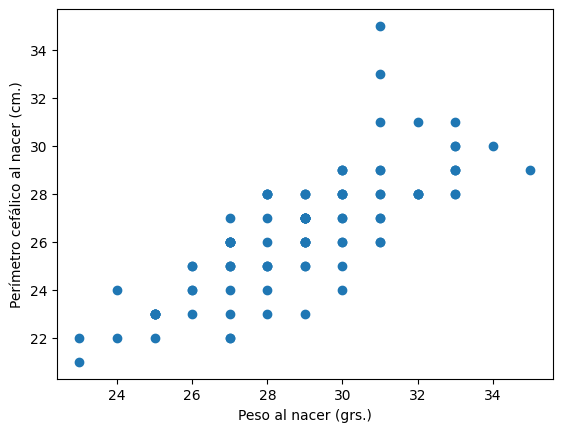

In [80]:
import matplotlib.pyplot as plt

# Definimos las variables que nos piden.
Y = df['headcirc']
X1 = df[' gestage']
X2 = df[' birthwt']

# Creamos la figura sobre la que vamos a plasmar el gráfico.
plt.figure()

# Establecemos la relación entre X1 y Y.
plt.scatter(X1, Y)

# Nombramos los ejes.
plt.xlabel('Peso al nacer (grs.)')
plt.ylabel('Perímetro cefálico al nacer (cm.)')

# Mostramos el gráfico.
plt.show()

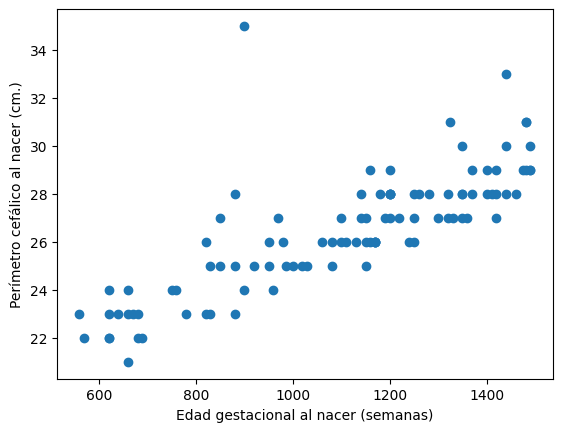

In [81]:
# Acá lo mismo.

# Creamos la figura sobre la que vamos a plasmar el gráfico.
plt.figure()

# Establecemos la relación entre X1 y Y.
plt.scatter(X2, Y)

# Nombramos los ejes.
plt.xlabel('Edad gestacional al nacer (semanas)')
plt.ylabel('Perímetro cefálico al nacer (cm.)')

# Mostramos el gráfico.
plt.show()

In [86]:
import statsmodels.api as sm

# b) Modelo de regresión lineal simple
X1 = sm.add_constant(df[' gestage'])  # Agregar constante
model1 = sm.OLS(df['headcirc'], X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               headcirc   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     152.9
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           1.00e-21
Time:                        02:46:08   Log-Likelihood:                -187.28
No. Observations:                 100   AIC:                             378.6
Df Residuals:                      98   BIC:                             383.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9143      1.829      2.140      0.0

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ------------------- -------------------- 4.7/9.9 MB 28.4 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 26.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
